In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# import folium
# from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df_droped = df.drop(['waterfront','yr_renovated'],axis=1)

In [5]:
df_droped.dropna(inplace=True)

In [6]:
df_droped.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df_droped.shape

(21534, 19)

In [8]:
df_droped.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [9]:
abs(df_droped.corr()) > 0.80

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


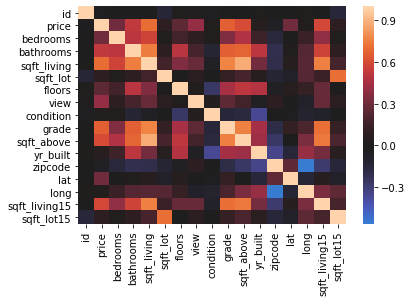

In [10]:
sns.heatmap(df_droped.corr(), center=0);

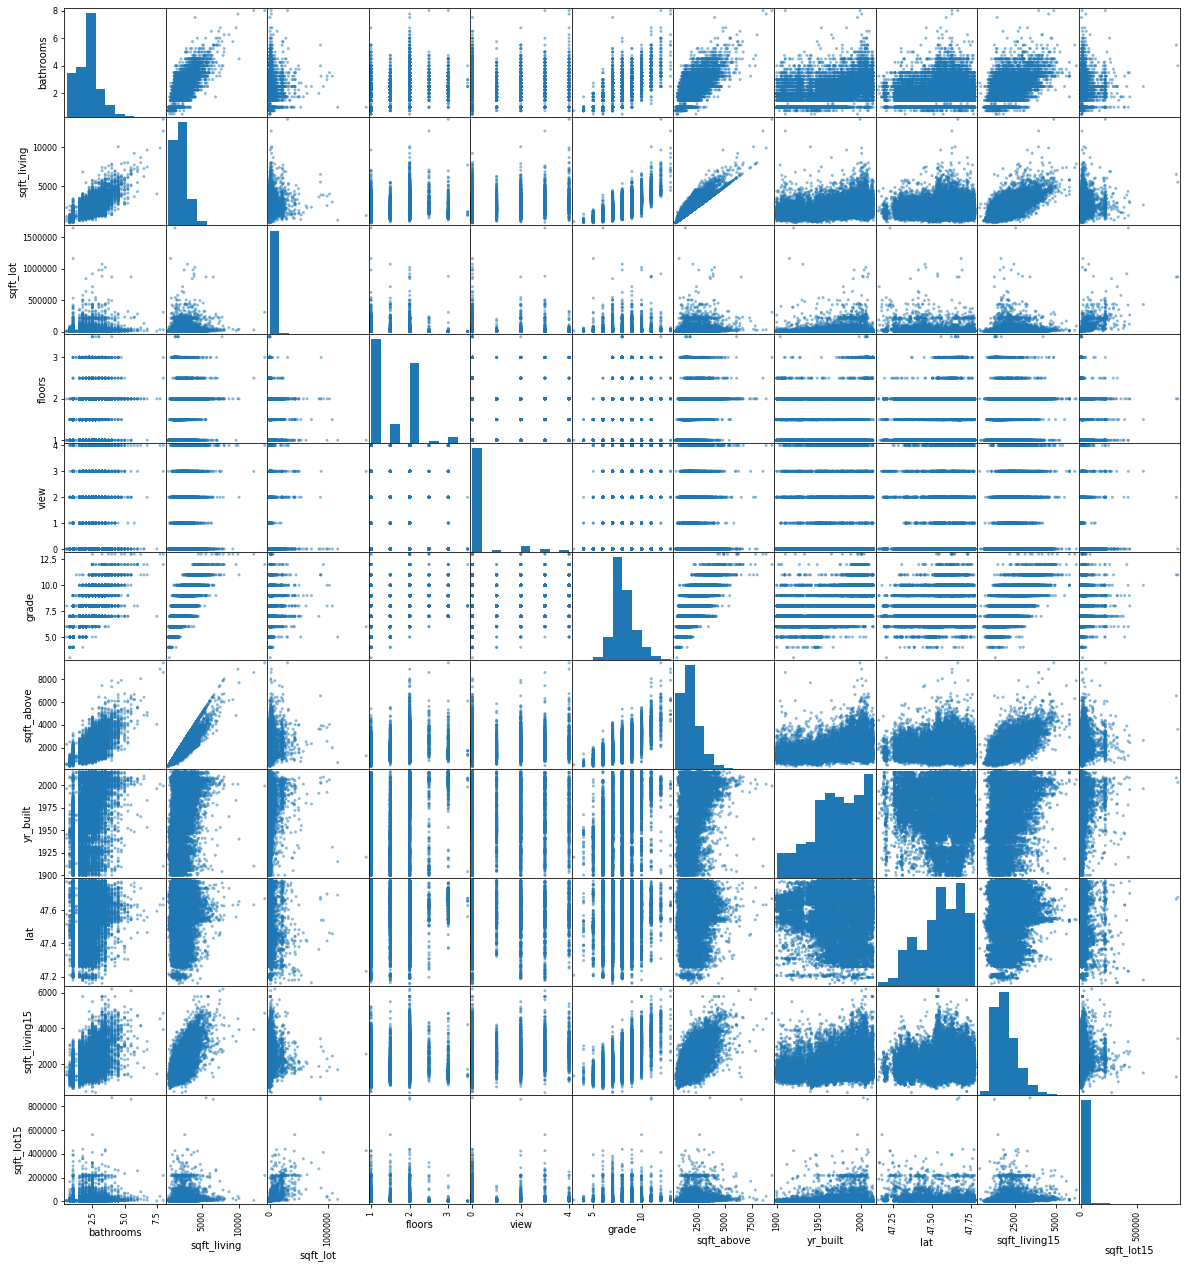

In [11]:
pd.plotting.scatter_matrix(df_droped[['bathrooms','sqft_living','sqft_lot','floors','view','grade','sqft_above',
                                    'yr_built','lat','sqft_living15','sqft_lot15']], figsize=(20,22));

In [12]:
#Creating a data frame with the veriables to use as predictors
df_1 = df_droped[['price','sqft_living','lat','grade','sqft_lot','yr_built']]

In [13]:
df_1.head()

,price,sqft_living,lat,grade,sqft_lot,yr_built
0,221900.0,1180,47.5112,7,5650,1955
1,538000.0,2570,47.7210,7,7242,1951
2,180000.0,770,47.7379,6,10000,1933
3,604000.0,1960,47.5208,7,5000,1965
4,510000.0,1680,47.6168,8,8080,1987


In [14]:
#Checking the correlation
df_1.corr()

,price,sqft_living,lat,grade,sqft_lot,yr_built
price,1.000000,0.701587,0.307868,0.668307,0.090338,0.054273
sqft_living,0.701587,1.000000,0.052383,0.762398,0.173768,0.318217
lat,0.307868,0.052383,1.000000,0.113787,-0.085143,-0.147850
grade,0.668307,0.762398,0.113787,1.000000,0.115122,0.448255
sqft_lot,0.090338,0.173768,-0.085143,0.115122,1.000000,0.052646
yr_built,0.054273,0.318217,-0.147850,0.448255,0.052646,1.000000


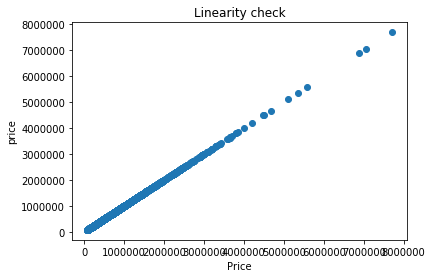

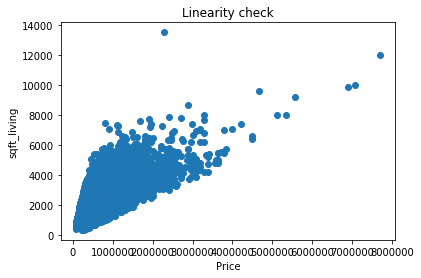

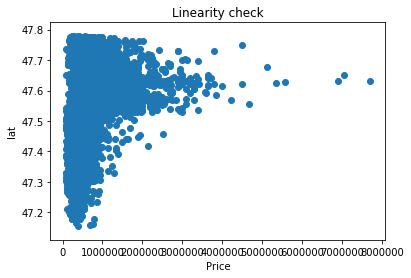

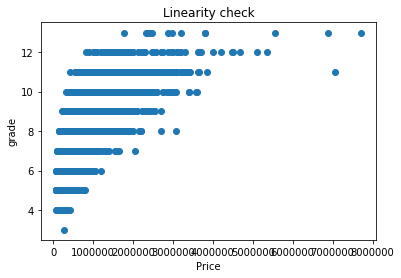

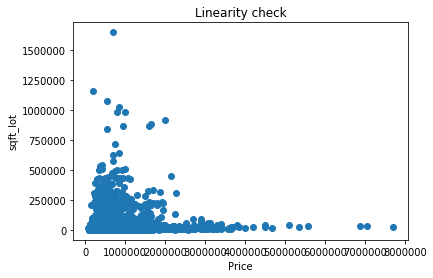

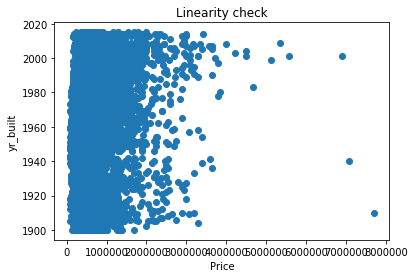

In [15]:
#Linearity check
for i in df_1.columns:
    plt.scatter(df_1.price, df_1[i])
    plt.title("Linearity check")
    plt.xlabel('Price')
    plt.ylabel(str(i))
    plt.show()

In [16]:
#identfying outliers
z = np.abs(stats.zscore(df_1))
print(z)

[[0.86916193 0.98081875 0.35358047 0.56064885 0.22814808 0.5447516 ]
 [0.00562125 0.53429112 1.16094832 0.56064885 0.18967469 0.68092013]
 [0.98362683 1.42772166 1.28294802 1.4134434  0.12302293 1.29367853]
 ...
 [0.37687818 1.15521988 0.24703343 0.56064885 0.3320649  1.29352361]
 [0.38261781 0.52301577 0.1853797  0.29214569 0.30697987 1.12331294]
 [0.58750725 1.15521988 0.24486775 0.56064885 0.33868658 1.25948148]]


In [17]:
threshold = 3
print(np.where(z > 3))
a = np.where(z>3)

(array([    5,    20,   142, ..., 21498, 21498, 21512]), array([1, 0, 4, ..., 0, 1, 1]))


In [18]:
outl_row_n = pd.Series(a[0])
outl_row_n
df_1.iloc[20]

price          2.000000e+06
sqft_living    3.050000e+03
lat            4.753160e+01
grade          9.000000e+00
sqft_lot       4.486700e+04
yr_built       1.968000e+03
Name: 21, dtype: float64

In [19]:
df_1.describe()

,price,sqft_living,lat,grade,sqft_lot,yr_built
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000
mean,5.400577e+05,2079.827854,47.560180,7.657425,1.509060e+04,1971.002275
std,3.660596e+05,917.446520,0.138528,1.172643,4.138021e+04,29.376044
min,7.800000e+04,370.000000,47.155900,3.000000,5.200000e+02,1900.000000
25%,3.220000e+05,1430.000000,47.471200,7.000000,5.040000e+03,1951.000000
50%,4.500000e+05,1910.000000,47.571900,7.000000,7.617000e+03,1975.000000
75%,6.450000e+05,2550.000000,47.678100,8.000000,1.068775e+04,1997.000000
max,7.700000e+06,13540.000000,47.777600,13.000000,1.651359e+06,2015.000000


In [20]:
df_1.shape

(21534, 6)

In [21]:
df_2 = df_1[(z < 3).all(axis=1)]

In [22]:
df_2.shape

(20643, 6)

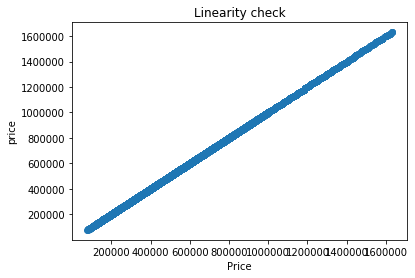

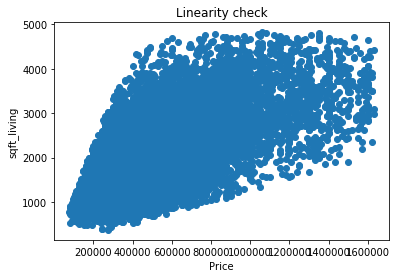

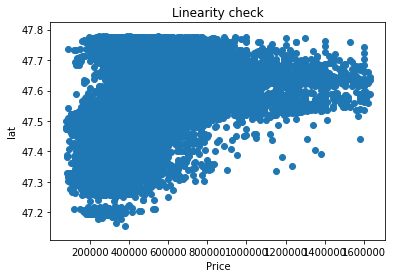

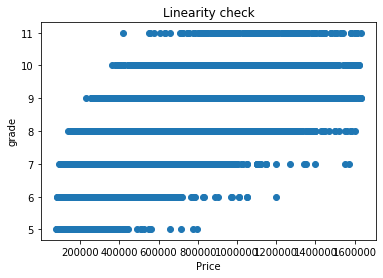

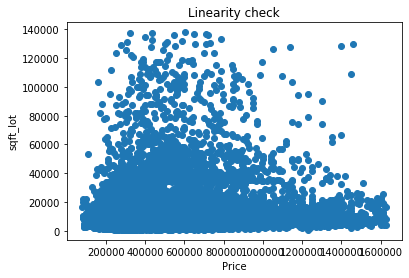

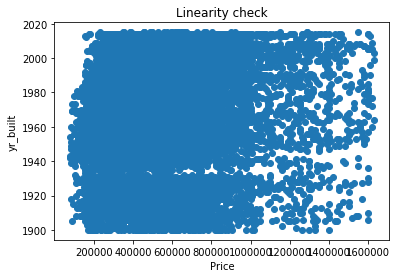

In [23]:
#df_2 linearity check
for i in df_2.columns:
    plt.scatter(df_2.price, df_2[i])
    plt.title("Linearity check")
    plt.xlabel('Price')
    plt.ylabel(str(i))
    plt.show()

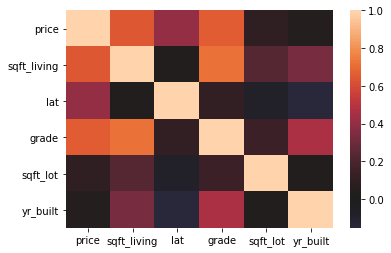

In [24]:
sns.heatmap(df_2.corr(), center=0);

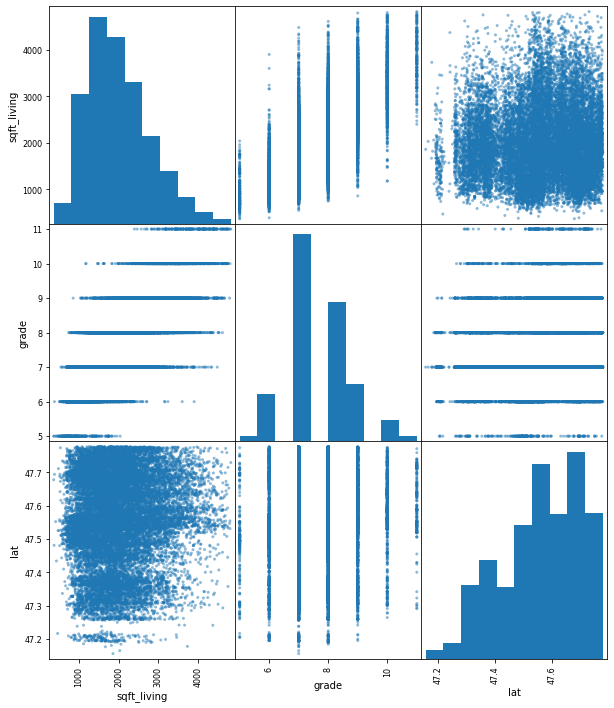

In [25]:
pd.plotting.scatter_matrix(df_2[['sqft_living','grade','lat']], figsize=(10,12));

In [26]:
##Transforming sqft_living

df_2['sqft_living'] = df_2['sqft_living'].map(lambda x: np.log(x))

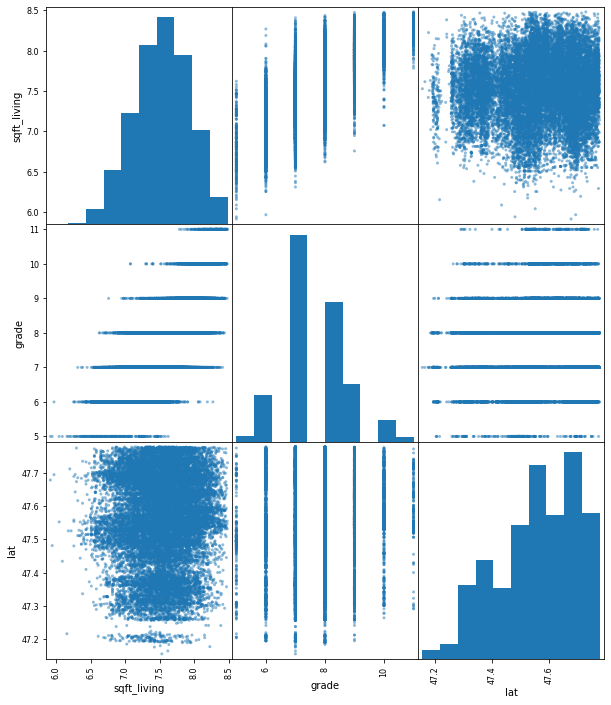

In [27]:
pd.plotting.scatter_matrix(df_2[['sqft_living','grade','lat']], figsize=(10,12));

In [28]:
outcome = 'price'
x_cols = ['sqft_living','grade','lat']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     9930.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:00:15   Log-Likelihood:            -2.7683e+05
No. Observations:               20643   AIC:                         5.537e+05
Df Residuals:                   20639   BIC:                         5.537e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.204e+07    3.9e+05    -82.207      0.000   -3.28e+07   -3.13e+07
sqft_living  2.046e+05   3975.726     51.461      0.000    1.97e+05    2.12e+05
grade        9.177e+04   1497.737     61.274      0.000    8.88e+04    9.47e+04
lat          6.372e+05   8166.418     78.025      0.000    6.21e+05    6.53e+05
==============================================================================
Omnibus:                     5845.083   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19651.824
Skew:                           1.424   Prob(JB):                         0.00
Kurtosis:                       6.838   Cond. No.                     1.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
## More visualizations on the relations between price and some other veriables 

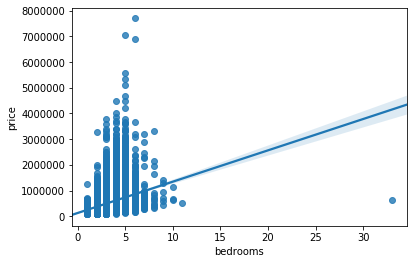

In [30]:

# use the function regplot to make a scatterplot
sns.regplot(x=df_droped["bedrooms"], y=df_droped["price"])
plt.show()

In [31]:
bedrooms = df_droped.bedrooms.unique()
bedrooms

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [32]:
df_droped.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


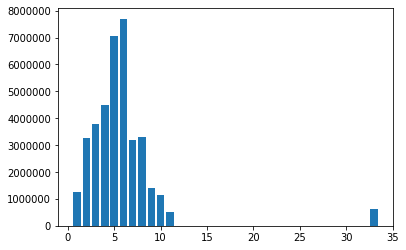

In [33]:
plt.bar(df_droped.bedrooms,df_droped.price)
plt.show()

In [34]:
a = df_droped[df_droped['bedrooms'] > 30] 
a

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [35]:
df_droped.shape

(21534, 19)

In [36]:
df_droped.drop([15856],axis=0,inplace=True)

In [37]:
df_droped.shape

(21533, 19)

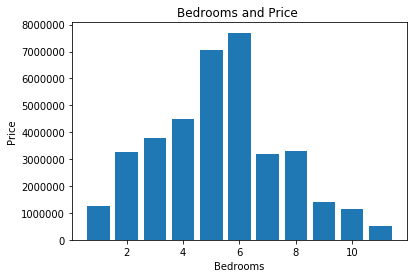

In [38]:
plt.bar(df_droped.bedrooms,df_droped.price)
plt.title("Bedrooms and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

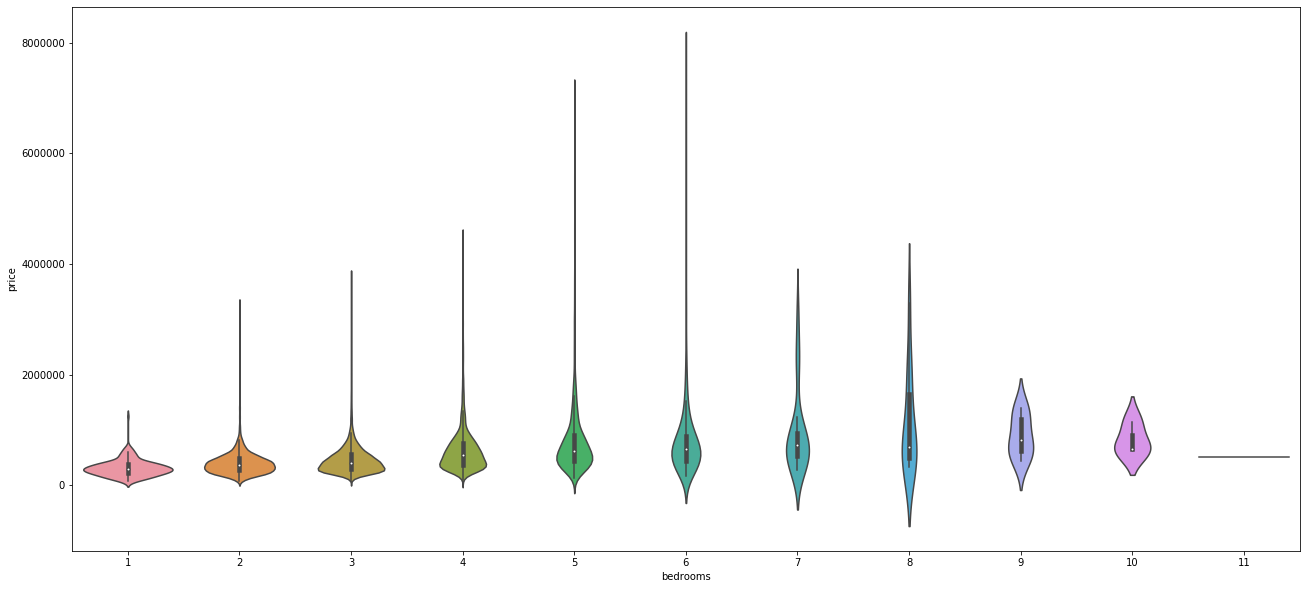

In [47]:
from matplotlib.pyplot import figure
a = figure(figsize=(22, 10))
sns.violinplot(y=df_droped.price,x=df_droped['bedrooms'] )
plt.show()


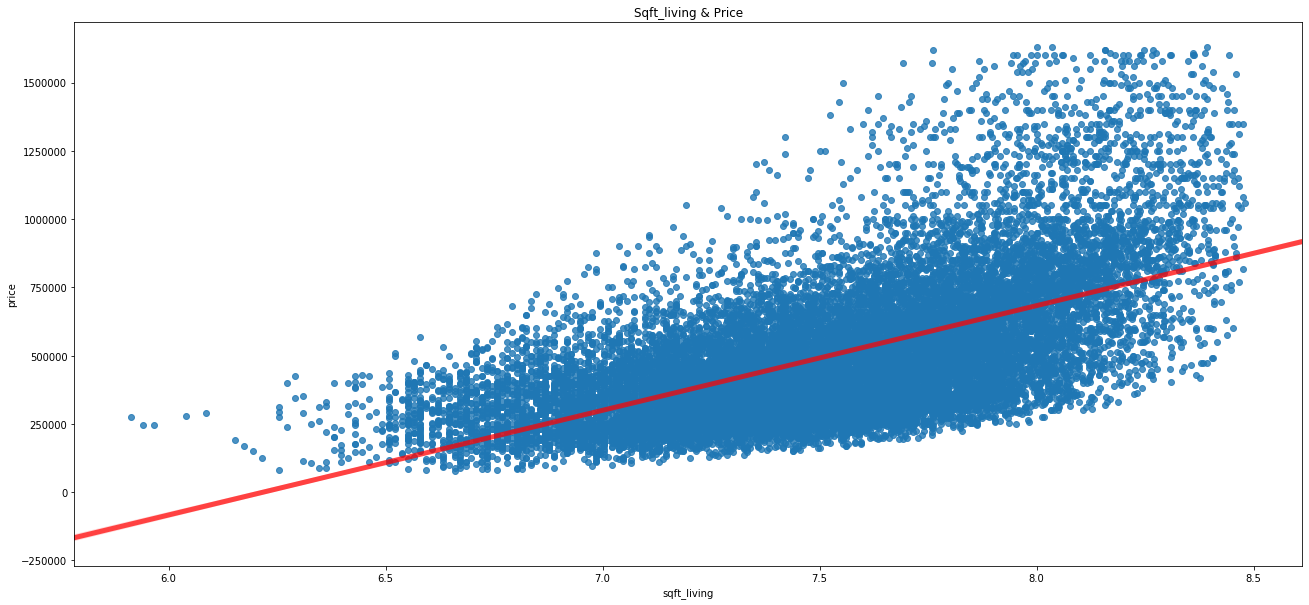

In [50]:
figure(figsize=(22, 10))
sns.regplot(x=df_2["sqft_living"], y=df_2["price"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Sqft_living & Price")
plt.show()

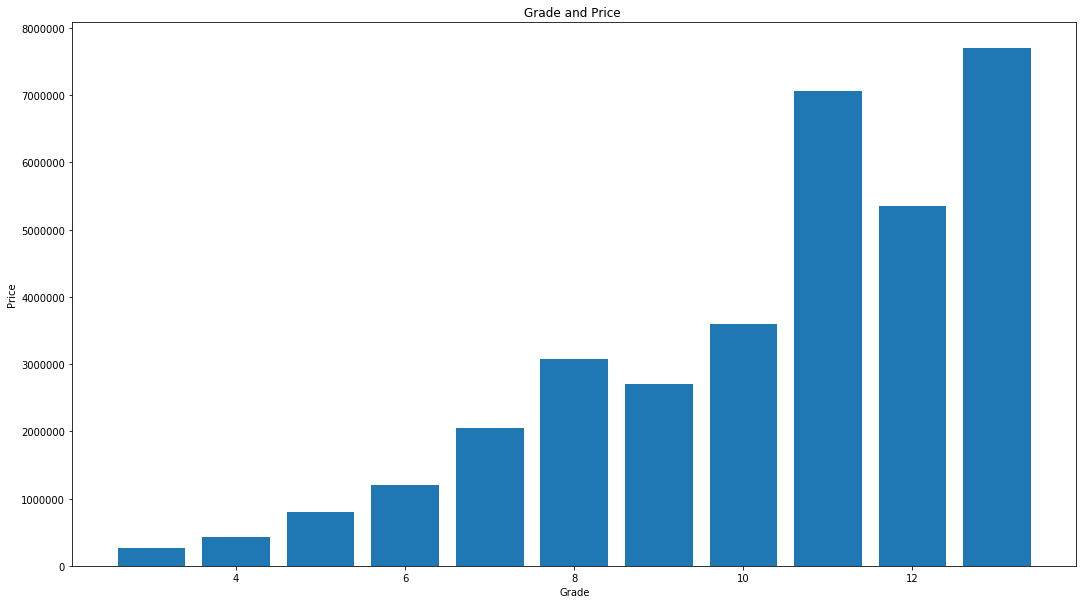

In [59]:

a = figure(figsize=(18, 10))

plt.bar(df_droped.grade,df_droped.price)
plt.title("Grade and Price ")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

<Figure size 1584x720 with 0 Axes>

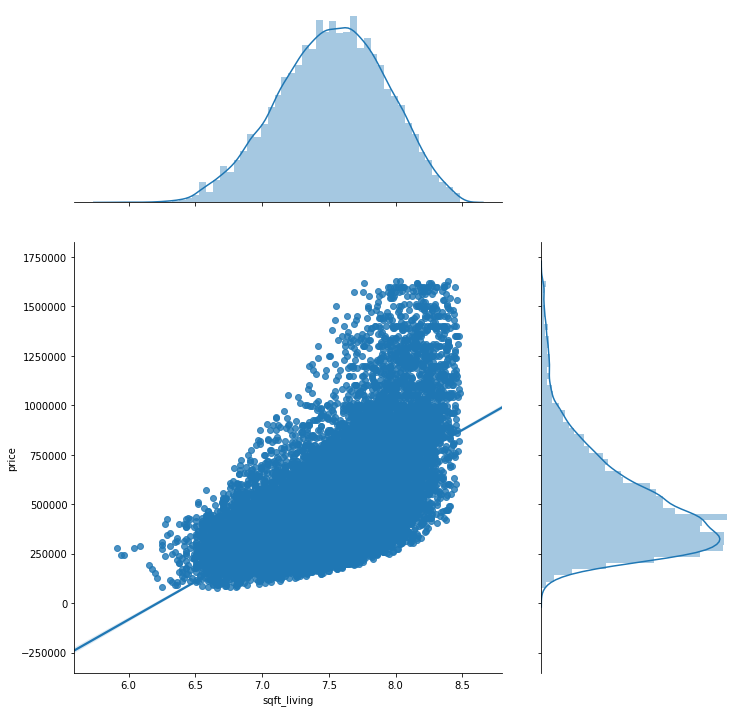

In [67]:
a = figure(figsize=(22, 10))
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df_2["sqft_living"], y=df_2["price"], kind='reg',height=10, ratio=2)

